# Imports

In [1]:
# mamba activate <env>
import pandas as pd
import seaborn as sns
from owlready2 import get_ontology, Thing
import matplotlib.pyplot as plt
import copy
import numpy as np
from adjustText import adjust_text

# Get the data from the CoDex

In [2]:
source = "https://raw.githubusercontent.com/galaxyproject/galaxy_codex/main/results/microgalaxy/tools.tsv"

df = pd.read_csv(source, sep="\t")
print(df.columns)
df.head()

Index(['Galaxy wrapper id', 'Galaxy tool ids', 'Description', 'bio.tool id',
       'bio.tool ids', 'biii', 'bio.tool name', 'bio.tool description',
       'EDAM operation', 'EDAM topic', 'Status', 'Source',
       'ToolShed categories', 'ToolShed id', 'Galaxy wrapper owner',
       'Galaxy wrapper source', 'Galaxy wrapper parsed folder',
       'Galaxy wrapper version', 'Conda id', 'Conda version',
       'EDAM operation (no superclasses)', 'EDAM topic (no superclasses)',
       'Available on UseGalaxy.org (Main)', 'Available on UseGalaxy.org.au',
       'Available on UseGalaxy.eu', 'Available on UseGalaxy.fr',
       'Tools available on UseGalaxy.org (Main)',
       'Tools available on UseGalaxy.org.au',
       'Tools available on UseGalaxy.eu', 'Tools available on UseGalaxy.fr',
       'Tools available on ANASTASIA', 'Tools available on APOSTL',
       'Tools available on ARGs-OAP', 'Tools available on BF2I-MAP',
       'Tools available on BioBix', 'Tools available on CIRM-CFBP',
  

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,Tools available on PhagePromotor,Tools available on Protologger,Tools available on UseGalaxy.be,Tools available on UseGalaxy.cz,Tools available on UseGalaxy.no,No. of tool users (2022-2023) (usegalaxy.eu),Total tool usage (usegalaxy.eu),Reviewed,Deprecated,To keep
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5,4,73,1004,True,False,True
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,0,1,1,23,984,True,False,True
2,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,True,False,True
3,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,0,0,0,3,3,1764,496717,True,False,True
4,abritamr,abritamr,A pipeline for running AMRfinderPlus and colla...,abritamr,abritamr,NaN,abriTAMR,an AMR gene detection pipeline that runs AMRFi...,Antimicrobial resistance prediction,"Microbiology, Public health and epidemiology, ...",...,0,0,0,0,0,0,0,True,False,True


# Create new rows, one row for each EDAM term per tool - to allow to visualize tools that are in multiple terms

In [3]:
inflated_tools = []

for idx, row in df.iterrows():
    terms = row["EDAM operation (no superclasses)"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools.append(row_c)
    else:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = "Undefined"
            inflated_tools.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools)


In [4]:
df_inflated_operation.head()

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,Tools available on Protologger,Tools available on UseGalaxy.be,Tools available on UseGalaxy.cz,Tools available on UseGalaxy.no,No. of tool users (2022-2023) (usegalaxy.eu),Total tool usage (usegalaxy.eu),Reviewed,Deprecated,To keep,EDAM operation single
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5,4,73,1004,True,False,True,Undefined
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1,1,23,984,True,False,True,Phylogenetic tree visualisation
2,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1,1,23,984,True,False,True,Phylogenetic inference (from molecular sequences)
3,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,True,False,True,Undefined
4,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,0,0,3,3,1764,496717,True,False,True,Antimicrobial resistance prediction


# Change term names for terms with low occurrences and tools without operations

In [6]:
# get terms with low occurrence
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]

# reassign low number terms to "Other" 
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"


# Plot EDAM operations

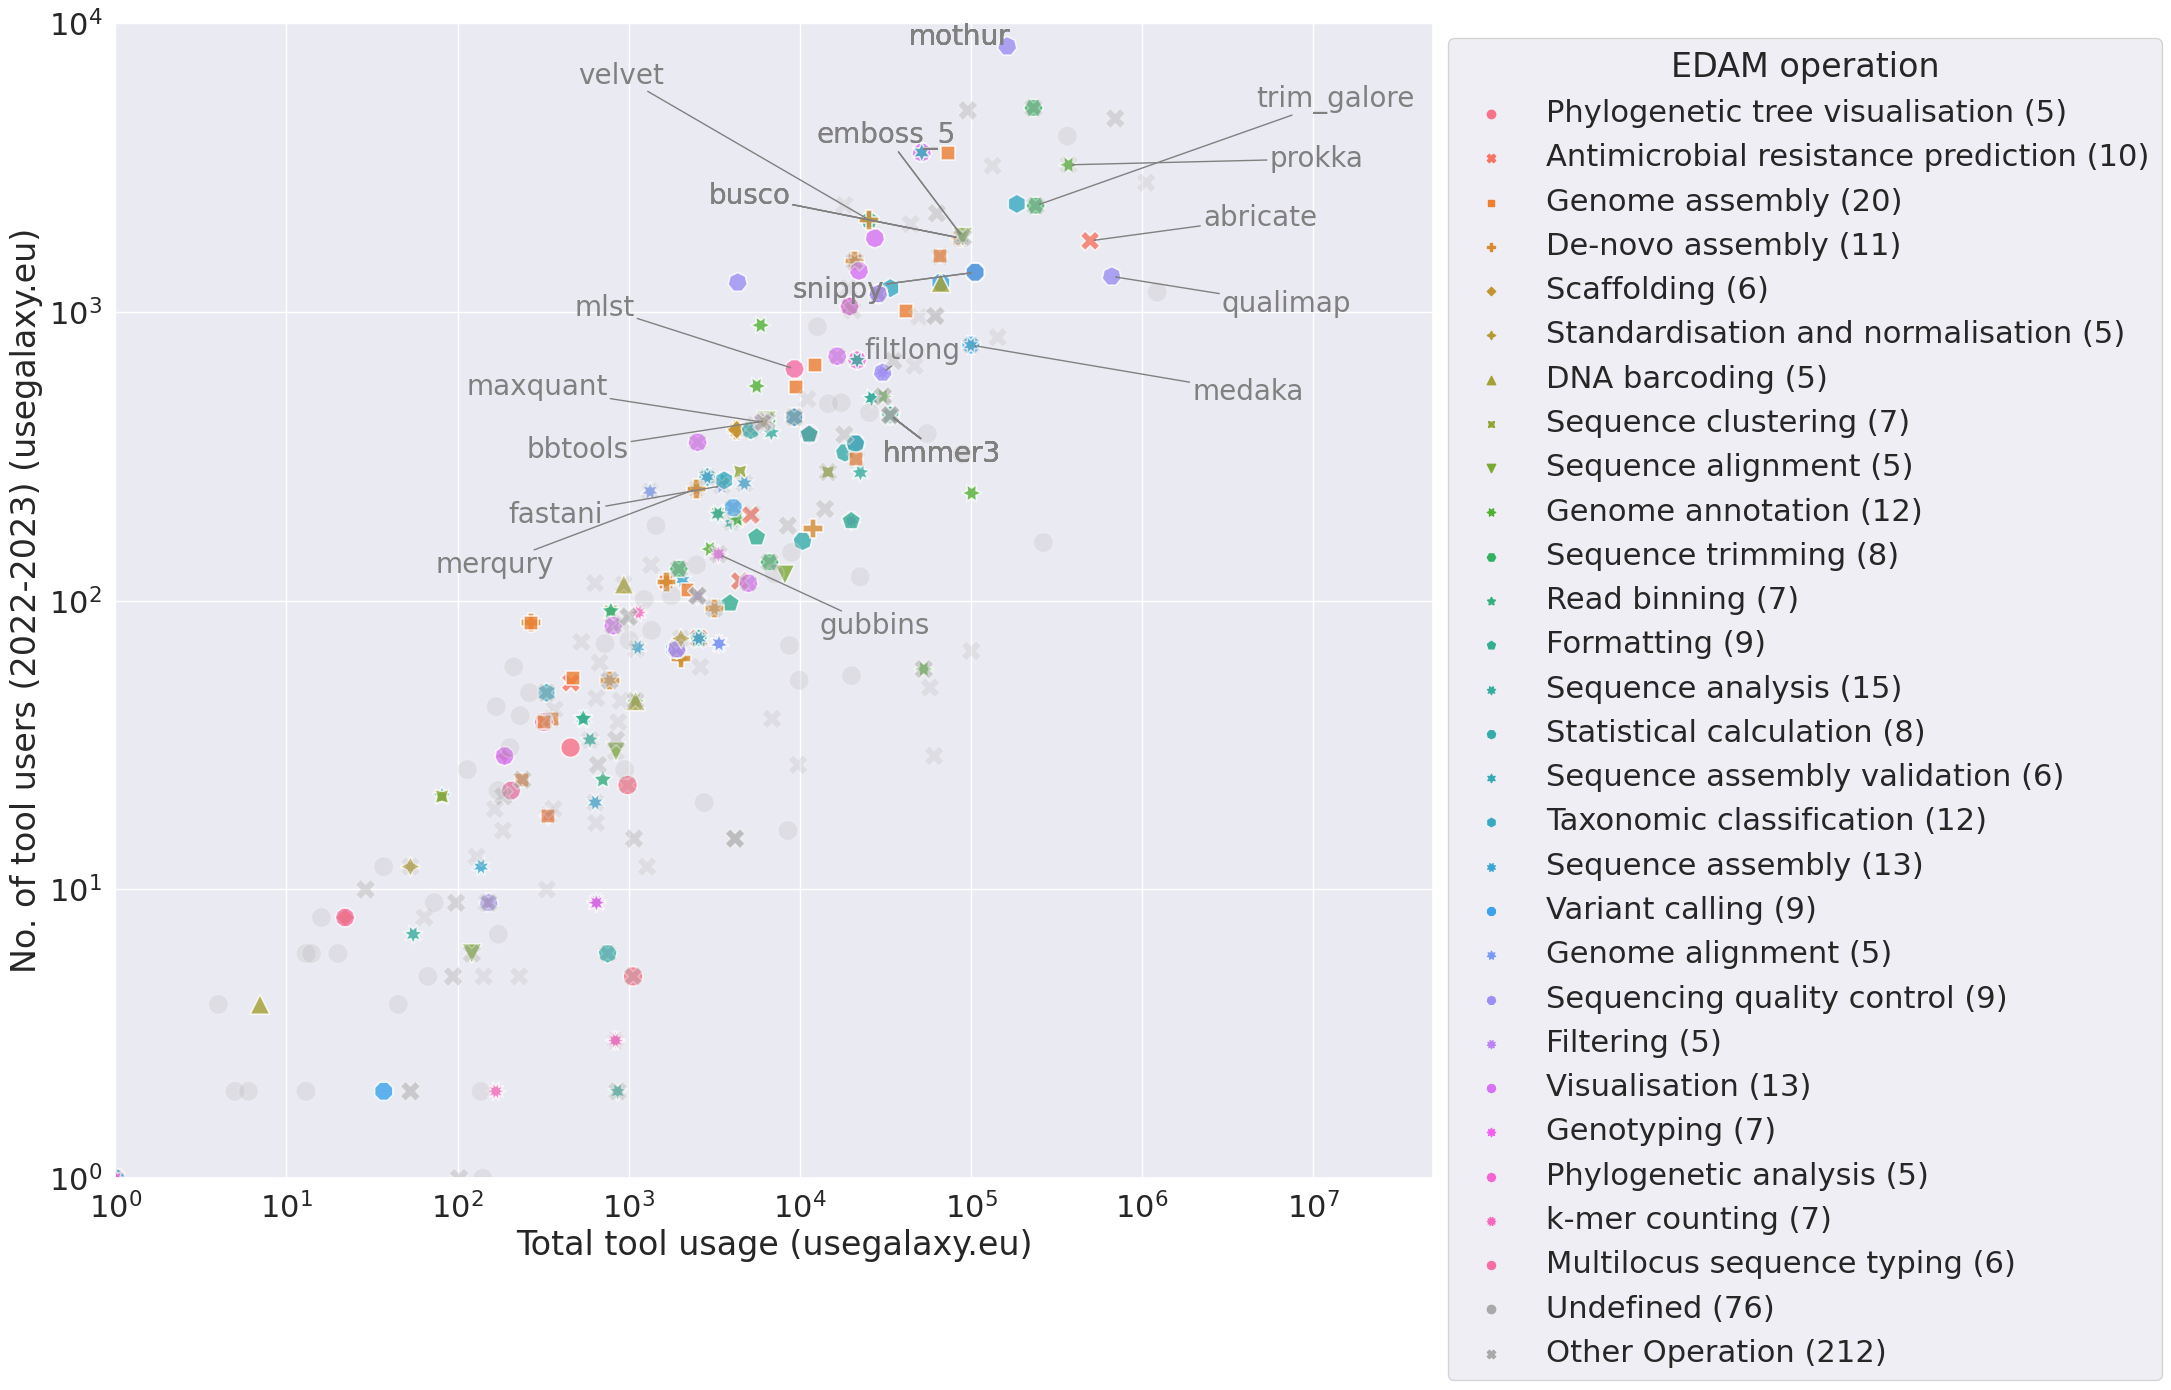

In [7]:
# global font size
sns.set()
sns.set(font_scale=2)  


# split in two df one of undef and other and rest
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]

# plt a figure
plt.figure(figsize=(17,15))

s = 200
# two axes in same plot to seperatly modify the dots
ax = sns.scatterplot(data=df_inflated_mod1_operation, 
                x='Total tool usage (usegalaxy.eu)', 
                y='No. of tool users (2022-2023) (usegalaxy.eu)', 
                hue="EDAM operation single",
                alpha=0.8,
                # markers=markers,
                style="EDAM operation single",
                # palette="deep"
                s=s
                )

ax2 = sns.scatterplot(data=df_inflated_mod2_operation, 
                x='Total tool usage (usegalaxy.eu)', 
                y='No. of tool users (2022-2023) (usegalaxy.eu)', 
                hue="EDAM operation single",
                alpha=0.2,
                # markers=markers,
                style="EDAM operation single",
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax,
                )


# log scale
plt.xscale('log')
plt.yscale('log')

# increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,50000000))

##########################################
# label highest used tools for each group
##########################################

# get highest tools for all groups:
max_idx = df_inflated_mod1_operation.groupby(["EDAM operation single"])['Total tool usage (usegalaxy.eu)'].transform("max") == df_inflated_mod1_operation['Total tool usage (usegalaxy.eu)']

df_inflated_mod_slice = df_inflated_mod1_operation[max_idx]

# i = 0
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Total tool usage (usegalaxy.eu)']
    y = row['No. of tool users (2022-2023) (usegalaxy.eu)']
    name = row['Galaxy wrapper id']
    # if not np.isnan(x) and not np.isnan(x):
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=20)
    texts.append(t)

# automatically adjust labels
adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))


# more legend outside of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

##############################
# Rename the legend to add the counts
##############################

# get value counts again
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM operation")

#title
# plt.title("microGalaxy Tool Catalogue")


#save
plt.savefig("../results/tools_operations_together.png", bbox_inches='tight')


# Inflate and add terms for Topics

In [8]:
# for topic

# create new rows, one row for each EDAM term per tool

inflated_tools = []

for idx, row in df.iterrows():
    terms = row["EDAM topic (no superclasses)"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = val
            inflated_tools.append(row_c)
    else:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = "Undefined"
            inflated_tools.append(row_c)

df_inflated_topics = pd.DataFrame(inflated_tools)

# get terms with low occurrence
value_counts = df_inflated_topics["EDAM topic single"].value_counts()
values = value_counts[(value_counts >= 5)]

# reassign low number terms to "Other" 
df_inflated_mod_topic = df_inflated_topics.copy()
df_inflated_mod_topic.loc[~df_inflated_mod_topic["EDAM topic single"].isin(values.index), "EDAM topic single"] = "Other Topic"


In [9]:
df_inflated_topics.head()

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,Tools available on Protologger,Tools available on UseGalaxy.be,Tools available on UseGalaxy.cz,Tools available on UseGalaxy.no,No. of tool users (2022-2023) (usegalaxy.eu),Total tool usage (usegalaxy.eu),Reviewed,Deprecated,To keep,EDAM topic single
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,5,4,73,1004,True,False,True,Undefined
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1,1,23,984,True,False,True,Phylogenetics
2,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,True,False,True,Undefined
3,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,0,0,3,3,1764,496717,True,False,True,Genomics
4,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,0,0,3,3,1764,496717,True,False,True,Microbiology


# Plot Topics

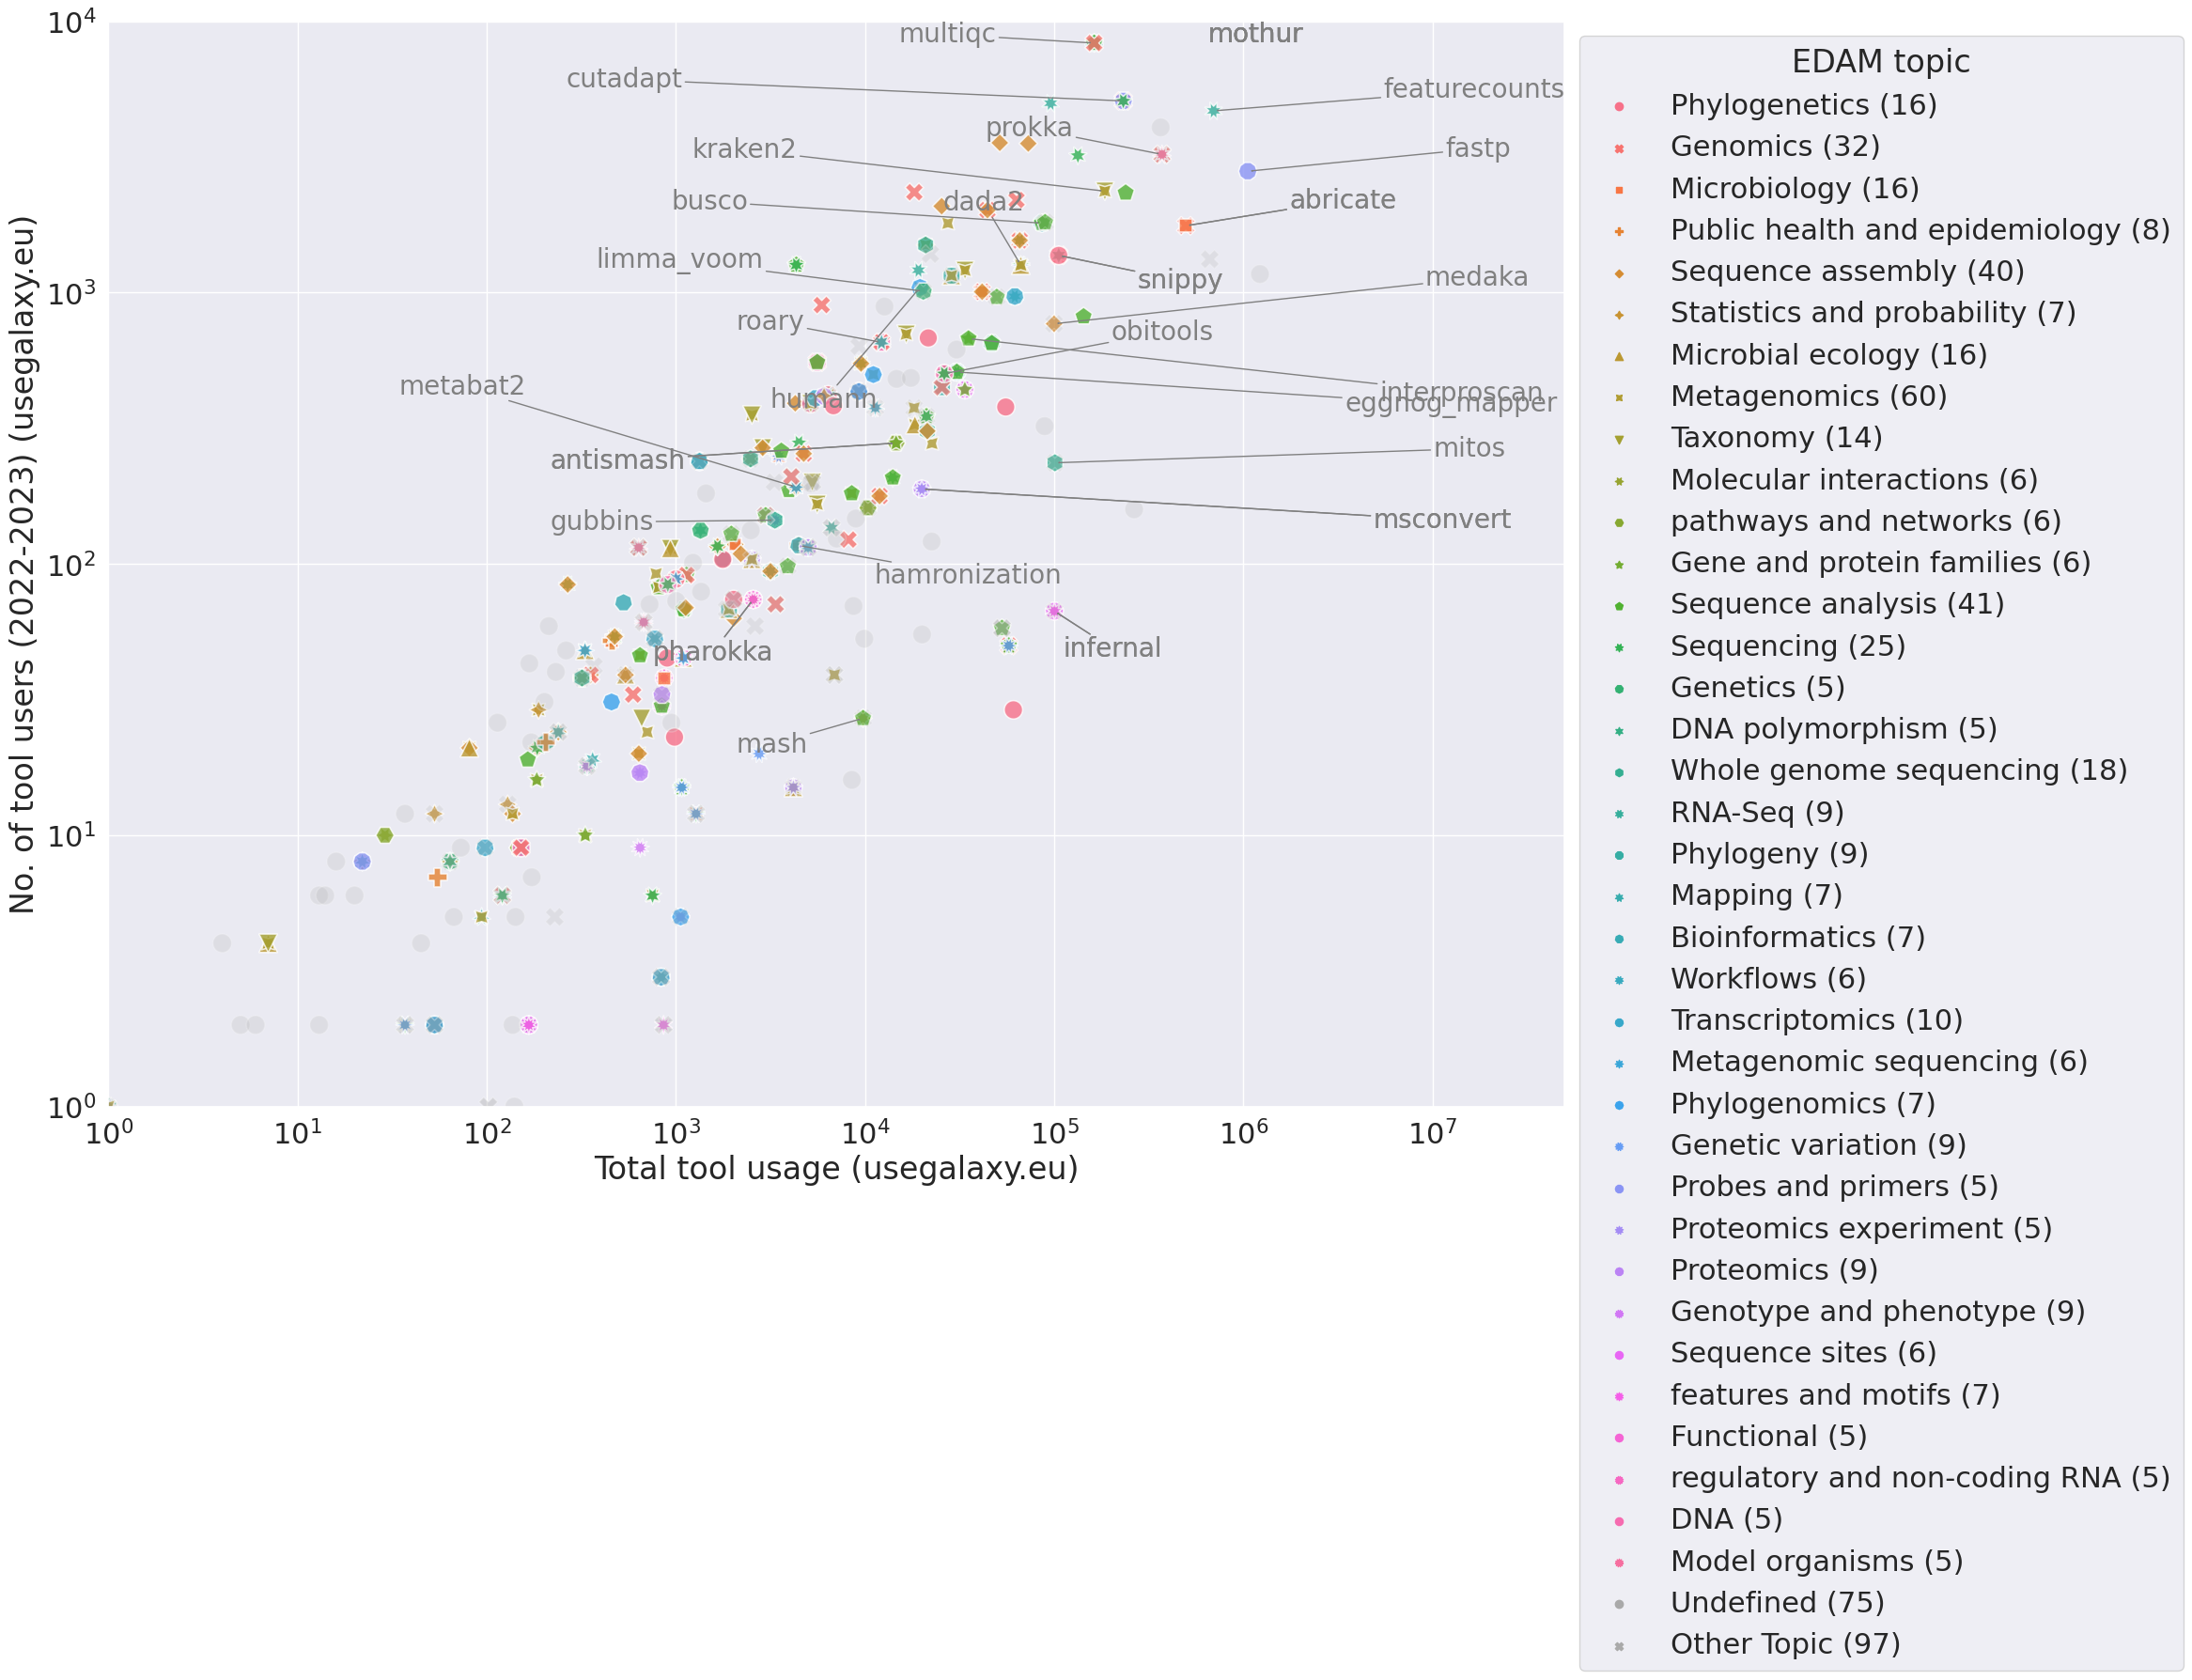

In [11]:
# global font size
sns.set()
sns.set(font_scale=2)  


# split in two df one of undef and other and rest
df_inflated_mod1_topic = df_inflated_mod_topic.loc[~df_inflated_mod_topic["EDAM topic single"].isin(["Undefined","Other Topic"])]
df_inflated_mod2_topic = df_inflated_mod_topic.loc[df_inflated_mod_topic["EDAM topic single"].isin(["Undefined","Other Topic"])]

# plt a figure
plt.figure(figsize=(20,15))

s = 200
# two axes in same plot to seperatly modify the dots
ax = sns.scatterplot(data=df_inflated_mod1_topic, 
                x='Total tool usage (usegalaxy.eu)', 
                y='No. of tool users (2022-2023) (usegalaxy.eu)', 
                hue="EDAM topic single",
                alpha=0.8,
                # markers=markers,
                style="EDAM topic single",
                # palette="deep"
                s=s
                )

ax2 = sns.scatterplot(data=df_inflated_mod2_topic, 
                x='Total tool usage (usegalaxy.eu)', 
                y='No. of tool users (2022-2023) (usegalaxy.eu)', 
                hue="EDAM topic single",
                alpha=0.2,
                # markers=markers,
                style="EDAM topic single",
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax,
                )


# log scale
plt.xscale('log')
plt.yscale('log')

# increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,50000000))

##########################################
# label highest used tools for each group
##########################################

# get highest tools for all groups:
max_idx = df_inflated_mod1_topic.groupby(["EDAM topic single"])['Total tool usage (usegalaxy.eu)'].transform("max") == df_inflated_mod1_topic['Total tool usage (usegalaxy.eu)']

df_inflated_mod_slice = df_inflated_mod1_topic[max_idx]

# i = 0
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Total tool usage (usegalaxy.eu)']
    y = row['No. of tool users (2022-2023) (usegalaxy.eu)']
    name = row['Galaxy wrapper id']
    # if not np.isnan(x) and not np.isnan(x):
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=20)
    texts.append(t)

# automatically adjust labels
adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))

# more legend outside of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

##############################
# Rename the legend to add the counts
##############################

# get value counts again
value_counts = df_inflated_mod_topic["EDAM topic single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM topic")

#title
# plt.title("microGalaxy Tool Catalogue")


#save
plt.savefig("../results/tools_topics_together.png", bbox_inches='tight')


# Calculating table statistics

In [7]:
# Get the total number of tools
total_tools = df.shape[0]

# Calculate total tool usage
total_tool_usage = df['Total tool usage (usegalaxy.eu)'].sum()

# Calculate the average number of tool users
average_tool_users = df['No. of tool users (2022-2023) (usegalaxy.eu)'].mean()

# Find the most used tool
most_used_tool = df.loc[df['Total tool usage (usegalaxy.eu)'].idxmax()]

# Find the tool with the most users
most_users_tool = df.loc[df['No. of tool users (2022-2023) (usegalaxy.eu)'].idxmax()]

total_tools, total_tool_usage, average_tool_users, most_used_tool, most_users_tool

(288,
 9170513,
 441.94444444444446,
 Galaxy wrapper id                                                                            ivar
 Galaxy tool ids                                 ivar_consensus, ivar_filtervariants, ivar_remo...
 Description                                     iVar is a computational package that contains ...
 bio.tool id                                                                                   NaN
 bio.tool ids                                                                                  NaN
                                                                       ...                        
 No. of tool users (2022-2023) (usegalaxy.eu)                                                 1171
 Total tool usage (usegalaxy.eu)                                                           1224275
 Reviewed                                                                                     True
 Deprecated                                                             

In [13]:
unique_tools = df["Galaxy wrapper id"].nunique()
unique_operations = df_inflated_operation["EDAM operation single"].nunique()
unique_topics = df_inflated_topics["EDAM topic single"].nunique()

# Tutorial titles by EDAM operation
titles_by_operation = df_inflated_mod_operation.groupby("EDAM operation single")["Galaxy wrapper id"].unique()

# Tutorial titles by EDAM topic
titles_by_topic = df_inflated_mod_topic.groupby("EDAM topic single")["Galaxy wrapper id"].unique()

# Print statistics
print(f"Total number of tools: {unique_tools}")
print(f"Total number of unique EDAM operations: {unique_operations}")
print(f"Total number of unique EDAM topics: {unique_topics}")

print("\nTools Wrapper by EDAM Operation:")
for operation, titles in titles_by_operation.items():
    print(f"\n{operation} ({len(titles)} Tool):")
    for title in titles:
        print(f" - {title}")

print("\nTools Wrapper by EDAM Topic:")
for topic, titles in titles_by_topic.items():
    print(f"\n{topic} ({len(titles)} Tool):")
    for title in titles:
        print(f" - {title}")

Total number of tools: 287
Total number of unique EDAM operations: 147
Total number of unique EDAM topics: 89

Tools Wrapper by EDAM Operation:

Antimicrobial resistance prediction (10 Tool):
 - abricate
 - abritamr
 - amrfinderplus
 - fargene
 - hamronization
 - mykrobe
 - pharokka
 - seqsero2
 - sonneityping
 - tb-profiler

DNA barcoding (5 Tool):
 - ancombc
 - dada2
 - lotus2
 - mothur
 - picrust

De-novo assembly (11 Tool):
 - abyss
 - flye
 - khmer
 - merqury
 - miniasm
 - nextdenovo
 - orfipy
 - quickmerge
 - vapor
 - velvet
 - wtdbg

Filtering (5 Tool):
 - filtlong
 - maaslin2
 - metaquantome
 - msconvert
 - read_it_and_keep

Formatting (7 Tool):
 - biom_format
 - format_metaphlan2_output
 - hmmer3
 - msconvert
 - pharokka
 - pygenometracks
 - velvet

Genome alignment (5 Tool):
 - fastani
 - gtdbtk
 - orthofinder
 - read_it_and_keep
 - seqsero2

Genome annotation (12 Tool):
 - bakta
 - eggnog_mapper
 - funannotate
 - integron_finder
 - maker
 - metabat2
 - metawrapmg
 - mitos
 -